<a href="https://colab.research.google.com/github/jojostx/eda-with-python/blob/main/kmeans_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.cluster import KMeans

In [4]:
# import the image data
img = plt.imread('/content/sample_data/using_kmeans_for_color_compression_tulips_photo.jpg')


(320, 240, 3)


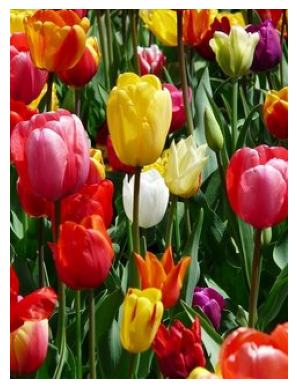

In [5]:
# display the image
print(img.shape)
plt.imshow(img)
plt.axis('off');

In [7]:
# Reshape the image so that each row represents a single pixel
img_flat = img.reshape(img.shape[0] * img.shape[1], img.shape[2])

img_flat.shape

(76800, 3)

In [8]:
img_flat[:5, :]

array([[211, 197,  38],
       [199, 181,  21],
       [178, 154,   0],
       [185, 152,   0],
       [184, 145,   0]], dtype=uint8)

In [12]:
# Create a pandas df with r, g, and b as columns
img_flat_df = pd.DataFrame(img_flat, columns = ['r', 'g', 'b'])
img_flat_df.head()

r    g   b
0  211  197  38
1  199  181  21
2  178  154   0
3  185  152   0
4  184  145   0

In [16]:
# Create 3D plot where each pixel in the `img` is displayed in its actual color
trace = go.Scatter3d(
    x=img_flat_df['r'],
    y=img_flat_df['g'],
    z=img_flat_df['b'],
    mode='markers',
    marker=dict(
        size=1,
        color=img_flat_df[['r', 'g', 'b']].to_numpy(),
        opacity=0.5
    )
)

layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))

fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(scene = dict(
                    xaxis_title='R',
                    yaxis_title='G',
                    zaxis_title='B'),
                  )
fig.show()

We can train a K-means model on this data. The algorithm will create k clusters by minimizing the squared distances from each point to its nearest centroid.

Let's first do an experiment. What would you expect to happen if we built a K-means model with just a single centroid (k = 1) and replaced each pixel in the photograph with the RGB value of that centroid? What would the photograph look like?

Let's try it.

In [28]:
# instantiate a kmeans model
model = KMeans(n_clusters=1, random_state=10).fit(img_flat)

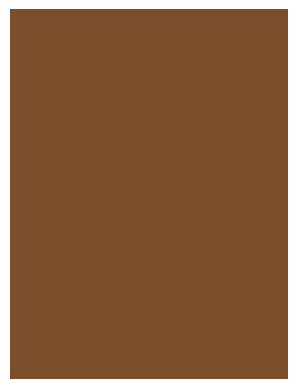

In [29]:
# Copy `img_flat` so we can modify it
img_flat1 = img_flat.copy()

# Replace each row in the original image with its closest cluster center
for i in np.unique(model.labels_):
    img_flat1[model.labels_==i,:] = model.cluster_centers_[i]

# Reshape the data back to (640, 480, 3)
img1 = img_flat1.reshape(img.shape)

plt.imshow(img1)
plt.axis('off');

In [31]:
# Calculate mean of each column in the flattened array
column_means = img_flat.mean(axis=0)

print('column means: ', column_means)
print('cluster centers: ', model.cluster_centers_)

column means:  [125.60802083  78.90632813  43.45473958]
cluster centers:  [[125.60802083  78.90632812  43.45473958]]


In [44]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [34]:
# Create 3D plot where each pixel in the `img` is displayed in its actual color
trace = go.Scatter3d(
    x=img_flat_df['r'],
    y=img_flat_df['g'],
    z=img_flat_df['b'],
    mode='markers',
    marker=dict(
        size=1,
        color=img_flat_df[['r', 'g', 'b']].to_numpy(),
        opacity=0.5
    )
)

layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))

fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(scene = dict(
                    xaxis_title='R',
                    yaxis_title='G',
                    zaxis_title='B'),
                  )

# Add centroid to chart
centroid = model.cluster_centers_[0].tolist()
centroid_color = f"rgb({','.join(map(str, centroid))})"

fig.add_trace(
    go.Scatter3d(x = [centroid[0]],
                 y = [centroid[1]],
                 z = [centroid[2]],
                 mode='markers',
                 marker=dict(size=7,
                             color=[centroid_color],
                             opacity=1))
)
fig.update_layout(scene = dict(
                    xaxis_title='R',
                    yaxis_title='G',
                    zaxis_title='B'),
                  )
fig.show()

In [37]:
# Instantiate k-means model for 3 clusters
kmeans3 = KMeans(n_clusters=3, random_state=42).fit(img_flat)

# Check the unique values of what's returned by the .labels_ attribute
print(np.unique(kmeans3.labels_))

# Assign centroid coordinates to `centers` variable
centers = kmeans3.cluster_centers_
print(centers)

[0 1 2]
[[202.94809272 174.18418712 111.37454869]
 [ 41.26942958  50.19883774  15.9462609 ]
 [176.79647115  43.60730575  27.50588141]]


In [39]:
# Helper function that creates color swatches
def show_swatch(RGB_value):
    '''
    Takes in an RGB value and outputs a color swatch
    '''
    R, G, B = RGB_value
    rgb = [[np.array([R,G,B]).astype('uint8')]]
    plt.figure()
    plt.imshow(rgb)
    plt.axis('off');

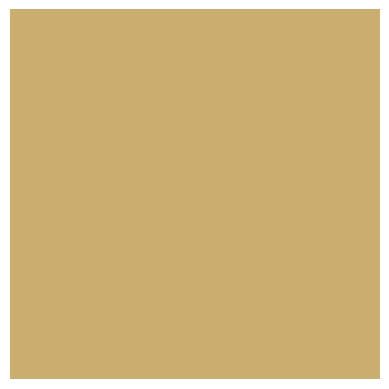

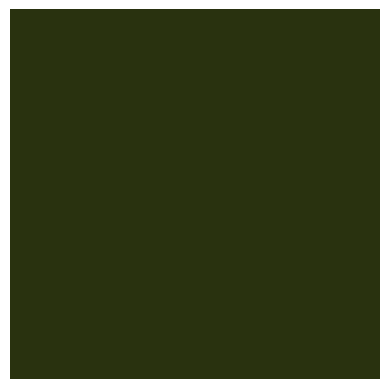

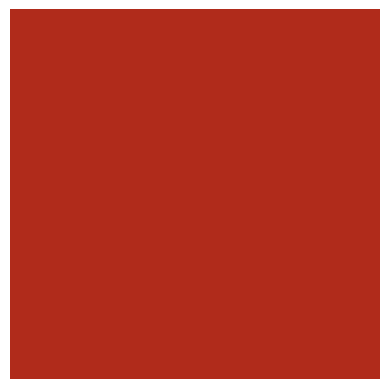

In [40]:
for color in centers:
  show_swatch(color)

In [45]:
# Helper function to display our photograph when clustered into k clusters
def cluster_image(k, img=img):
    '''
    Fits a K-means model to a photograph.
    Replaces photo's pixels with RGB values of model's centroids.
    Displays the updated image.

    Args:
      k:    (int)          - Your selected K-value
      img:  (numpy array)  - Your original image converted to a numpy array

    Returns:
      The output of plt.imshow(new_img), where new_img is a new numpy array \\
      where each row of the original array has been replaced with the \\
      coordinates of its nearest centroid.
    '''

    img_flat = img.reshape(img.shape[0]*img.shape[1], 3)
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(img_flat)
    new_img = img_flat.copy()

    for i in np.unique(kmeans.labels_):
        new_img[kmeans.labels_ == i, :] = kmeans.cluster_centers_[i]

    new_img = new_img.reshape(img.shape)

    return plt.imshow(new_img), plt.axis('off');

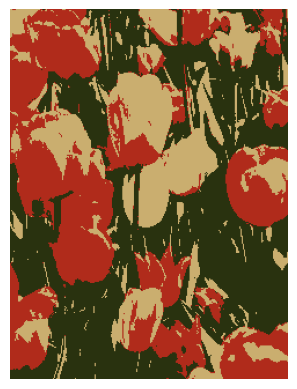

In [46]:
# Generate image when k=3
cluster_image(3);

In [47]:
print(kmeans3.labels_.shape)
print(kmeans3.labels_)
print(np.unique(kmeans3.labels_))
print(kmeans3.cluster_centers_)

(76800,)
[0 0 2 ... 2 2 2]
[0 1 2]
[[202.94809272 174.18418712 111.37454869]
 [ 41.26942958  50.19883774  15.9462609 ]
 [176.79647115  43.60730575  27.50588141]]


In [48]:
# Create a new column in the df that indicates the cluster number of each row
# (as assigned by Kmeans for k=3)
img_flat_df['cluster'] = kmeans3.labels_
img_flat_df.head()

r    g   b  cluster
0  211  197  38        0
1  199  181  21        0
2  178  154   0        2
3  185  152   0        2
4  184  145   0        2

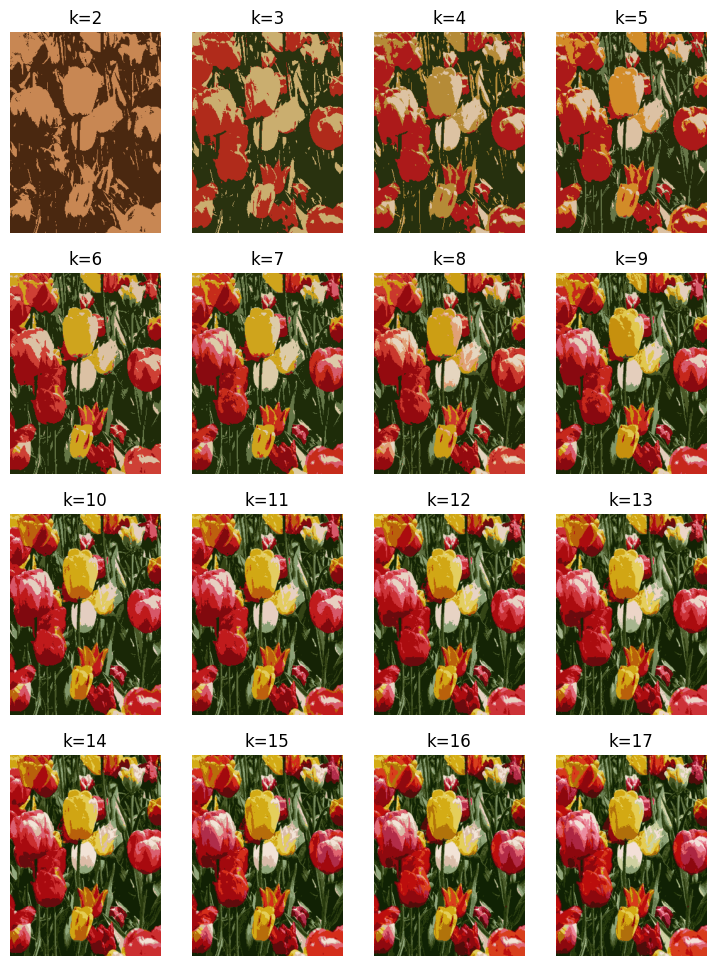

In [54]:
# Helper function to plot image grid
def cluster_image_grid(k, ax, img=img):
    '''
    Fits a K-means model to a photograph.
    Replaces photo's pixels with RGB values of model's centroids.
    Displays the updated image on an axis of a figure.

    Args:
      k:    (int)          - Your selected K-value
      ax:   (int)          - Index of the axis of the figure to plot to
      img:  (numpy array)  - Your original image converted to a numpy array

    Returns:
      A new image where each row of img's array has been replaced with the \\
      coordinates of its nearest centroid. Image is assigned to an axis that \\
      can be used in an image grid figure.
    '''
    img_flat = img.reshape(img.shape[0]*img.shape[1], 3)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(img_flat)
    new_img = img_flat.copy()

    for i in np.unique(kmeans.labels_):
        new_img[kmeans.labels_==i, :] = kmeans.cluster_centers_[i]

    new_img = new_img.reshape(img.shape)
    ax.imshow(new_img)
    ax.axis('off')

fig, axs = plt.subplots(4, 4)
fig = plt.gcf()
fig.set_size_inches(9, 12)
axs = axs.flatten()

# plot the images for all the Ks from 2 to 10
k_values = np.arange(2, 18)
for i, k in enumerate(k_values):
    cluster_image_grid(k, axs[i], img=img)
    axs[i].title.set_text('k=' + str(k))

 it becomes increasingly difficult to see the difference between the images each time a color is added. This is a visual example of something that happens with all clustering models, even if the data is not an image that you can see. As you group the data into more and more clusters, additional clusters beyond a certain point contribute less and less to your understanding of your data.